<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/Telecom_Attack_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study: Telecom_Attack_Multiclass

# Business Problem
To identify whether a telecom network is under attack or not and identify the type of attack based on the network logs.

# Importing the packages

In [ ]:
!pip -q install pandas_profiling==2.5.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd                                           # Pandas package for reading csv files
import numpy as np                                            # Numpy package for computing
import matplotlib.pyplot as plt                               # Visualization package

%matplotlib inline

In [ ]:
import seaborn as sns                                         # Visualization package

import dask.dataframe as dd                                   # Dask to read and manipulate dataframe

In [ ]:
# Install the necessary ML explainability packages
!pip -q install imgaug==0.2.6
!pip -q install shap
!pip -q install lime
!pip -q install eli5

In [ ]:
%time          
# Check the time to run a particular cell

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Projects/Case Studies/Telecom_Attack/telecom_train.csv')# Reading the data using simple Pandas

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
%time

df_train = dd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Projects/Case Studies/Telecom_Attack/telecom_train.csv')                    # Reading the data using Dask

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [ ]:
train.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0  udp    other   SF  146     0    0    0    0    0    0    0    0    0   
1  0  tcp  private   S0    0     0    0    0    0    0    0    0    0    0   
2  0  tcp     http   SF  232  8153    0    0    0    0    0    1    0    0   
3  0  tcp     http   SF  199   420    0    0    0    0    0    1    0    0   
4  0  tcp  private  REJ    0     0    0    0    0    0    0    0    0    0   

   0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.17    2  2.1  0.00  0.00.1  \
0     0     0     0     0     0     0     0     0   13    1   0.0     0.0   
1     0     0     0     0     0     0     0     0  123    6   1.0     1.0   
2     0     0     0     0     0     0     0     0    5    5   0.2     0.2   
3     0     0     0     0     0     0     0     0   30   32   0.0     0.0   
4     0     0     0     0     0     0     0     0  121   19   0.0     0.0   

   0.00.2  0.00.3  1.00  0.00.4  0.00.5  150   25  0.17.1  0.03  0.17.2  \
0     0.0     0.0  0.08    0.15    0.00  255    1    0.00  0.60    0.88   
1     0.0     0.0  0.05    0.07    0.00  255   26    0.10  0.05    0.00   
2     0.0     0.0  1.00    0.00    0.00   30  255    1.00  0.00    0.03   
3     0.0     0.0  1.00    0.00    0.09  255  255    1.00  0.00    0.00   
4     1.0     1.0  0.16    0.06    0.00  255   19    0.07  0.07    0.00   

   0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00   1.0    1.00  neptune  21

In [ ]:
# Lets have a look at the number of columns

train.shape

(125972, 43)

**Observation**
- We see that there are 43 columns but the column names are missing, because this a second hand data. 
-  Lets name each column, ref from Telecom Attack binary data.

In [ ]:
# Setting the column names

col_names = ['Duration', 'Protocol_type','Service','Flag','Src_bytes','Dst_bytes',
            'Land','Wrong_fragment','Urgent','Hot','Num_failed_logins','Logged_in',
            'Num_compromised','Root_shell','Su_attempted','Num_root','Num_file_creations',
            'Num_shells','Num_access_files','Num_outbound_cmds','Is_hot_login',
            'Is_guest_login','Count','Srv_count','Serror_rate','Srv_serror_rate',
            'Rerror_rate','Srv_rerror_rate','Same_srv_rate','Diff_srv_rate',
            'Srv_diff_host_rate','Dst_host_count','Dst_host_srv_count',
            'Dst_host_same_srv_rate','Dst_host_diff_srv_rate',
            'Dst_host_same_src_port_rate','Dst_host_srv_diff_host_rate',
            'Dst_host_serror_rate','Dst_host_srv_serror_rate',
            'Dst_host_rerror_rate','Dst_host_srv_rerror_rate','attack','last_flag']        

In [ ]:
# Lets check the number of colums 
len(col_names)

43

In [ ]:
# Lets set the columns for the train dataset

train.columns = col_names

In [ ]:
pd.set_option('display.max_columns', 50)                    # For displaying all the columns

train.head()

Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_fragment  Urgent  Hot  Num_failed_logins  Logged_in  Num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          1                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          0                0   

   Root_shell  Su_attempted  Num_root  Num_file_creations  Num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   Num_access_files  Num_outbound_cmds  Is_hot_login  Is_guest_login  Count  \
0                 0                  0             0               0     13   
1                 0                  0             0               0    123   
2                 0                  0             0               0      5   
3                 0                  0             0               0     30   
4                 0                  0             0               0    121   

   Srv_count  Serror_rate  Srv_serror_rate  Rerror_rate  Srv_rerror_rate  \
0          1          0.0              0.0          0.0              0.0   
1          6          1.0              1.0          0.0              0.0   
2          5          0.2              0.2          0.0              0.0   
3         32          0.0              0.0          0.0              0.0   
4         19          0.0              0.0          1.0              1.0   

   Same_srv_rate  Diff_srv_rate  Srv_diff_host_rate  Dst_host_count  \
0           0.08           0.15                0.00             255   
1           0.05           0.07                0.00             255   
2           1.00           0.00                0.00              30   
3           1.00           0.00                0.09             255   
4           0.16           0.06                0.00             255   

   Dst_host_srv_count  Dst_host_same_srv_rate  Dst_host_diff_srv_rate  \
0                   1                    0.00                    0.60   
1                  26                    0.10                    0.05   
2                 255                    1.00                    0.00   
3                 255                    1.00                    0.00   
4                  19                    0.07                    0.07   

   Dst_host_same_src_port_rate  Dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   Dst_host_serror_rate  Dst_host_srv_serror_rate  Dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   Dst_host_srv_rerror

In [ ]:
# train.to_csv('telecom_train_multi.csv')

In [ ]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [ ]:
# Number of labels do we have in our target column

train.iloc[:,-2].nunique()

23

# Exploratory Data Analysis

In [ ]:
# Using Pandas profiling to perform EDA

import pandas_profiling

reports1=pandas_profiling.ProfileReport(train, minimal=True)   
reports1.to_file('train_EDA.html')                    # Creating HTML file for pandas profiling

In [ ]:
from IPython.display import display, HTML, IFrame
display(HTML(open('train_EDA.html').read()))

- In this report we are unable to see the correlation between a lot of columns, because of too many colums. However, we ill plot the correlation seperatly further.
- we see, many columns are skewed and service col has high cardinality

In [ ]:
# Checking the data types and missing values

train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
Duration                       125972 non-null int64
Protocol_type                  125972 non-null object
Service                        125972 non-null object
Flag                           125972 non-null object
Src_bytes                      125972 non-null int64
Dst_bytes                      125972 non-null int64
Land                           125972 non-null int64
Wrong_fragment                 125972 non-null int64
Urgent                         125972 non-null int64
Hot                            125972 non-null int64
Num_failed_logins              125972 non-null int64
Logged_in                      125972 non-null int64
Num_compromised                125972 non-null int64
Root_shell                     125972 non-null int64
Su_attempted                   125972 non-null int64
Num_root                       125972 non-null int64
Num_file_creations             125972 

Duration                       0
Protocol_type                  0
Service                        0
Flag                           0
Src_bytes                      0
Dst_bytes                      0
Land                           0
Wrong_fragment                 0
Urgent                         0
Hot                            0
Num_failed_logins              0
Logged_in                      0
Num_compromised                0
Root_shell                     0
Su_attempted                   0
Num_root                       0
Num_file_creations             0
Num_shells                     0
Num_access_files               0
Num_outbound_cmds              0
Is_hot_login                   0
Is_guest_login                 0
Count                          0
Srv_count                      0
Serror_rate                    0
Srv_serror_rate                0
Rerror_rate                    0
Srv_rerror_rate                0
Same_srv_rate                  0
Diff_srv_rate                  0
Srv_diff_h

**There are no null values.**

In [ ]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [ ]:
train.describe().T

count          mean           std  min    25%  \
Duration                     125972.0    287.146929  2.604526e+03  0.0   0.00   
Src_bytes                    125972.0  45567.100824  5.870354e+06  0.0   0.00   
Dst_bytes                    125972.0  19779.271433  4.021285e+06  0.0   0.00   
Land                         125972.0      0.000198  1.408613e-02  0.0   0.00   
Wrong_fragment               125972.0      0.022688  2.535310e-01  0.0   0.00   
Urgent                       125972.0      0.000111  1.436608e-02  0.0   0.00   
Hot                          125972.0      0.204411  2.149977e+00  0.0   0.00   
Num_failed_logins            125972.0      0.001222  4.523932e-02  0.0   0.00   
Logged_in                    125972.0      0.395739  4.890107e-01  0.0   0.00   
Num_compromised              125972.0      0.279253  2.394214e+01  0.0   0.00   
Root_shell                   125972.0      0.001342  3.660299e-02  0.0   0.00   
Su_attempted                 125972.0      0.001103  4.515456e-02  0.0   0.00   
Num_root                     125972.0      0.302194  2.439971e+01  0.0   0.00   
Num_file_creations           125972.0      0.012669  4.839370e-01  0.0   0.00   
Num_shells                   125972.0      0.000413  2.218122e-02  0.0   0.00   
Num_access_files             125972.0      0.004096  9.936995e-02  0.0   0.00   
Num_outbound_cmds            125972.0      0.000000  0.000000e+00  0.0   0.00   
Is_hot_login                 125972.0      0.000008  2.817494e-03  0.0   0.00   
Is_guest_login               125972.0      0.009423  9.661271e-02  0.0   0.00   
Count                        125972.0     84.108207  1.145088e+02  0.0   2.00   
Srv_count                    125972.0     27.738093  7.263609e+01  0.0   2.00   
Serror_rate                  125972.0      0.284487  4.464567e-01  0.0   0.00   
Srv_serror_rate              125972.0      0.282488  4.470236e-01  0.0   0.00   
Rerror_rate                  125972.0      0.119959  3.204366e-01  0.0   0.00   
Srv_rerror_rate              125972.0      0.121184  3.236483e-01  0.0   0.00   
Same_srv_rate                125972.0      0.660925  4.396236e-01  0.0   0.09   
Diff_srv_rate                125972.0      0.063053  1.803150e-01  0.0   0.00   
Srv_diff_host_rate           125972.0      0.097322  2.598314e-01  0.0   0.00   
Dst_host_count               125972.0    182.149200  9.920657e+01  0.0  82.00   
Dst_host_srv_count           125972.0    115.653725  1.107029e+02  0.0  10.00   
Dst_host_same_srv_rate       125972.0      0.521244  4.489501e-01  0.0   0.05   
Dst_host_diff_srv_rate       125972.0      0.082952  1.889225e-01  0.0   0.00   
Dst_host_same_src_port_rate  125972.0      0.148379  3.089984e-01  0.0   0.00   
Dst_host_srv_diff_host_rate  125972.0      0.032543  1.125642e-01  0.0   0.00   
Dst_host_serror_rate         125972.0      0.284455  4.447851e-01  0.0   0.00   
Dst_host_srv_serror_rate     125972.0      0.278487  4.456702e-01  0.0   0.00   
Dst_host_rerror_rate         125972.0      0.118832  3.065586e-01  0.0   0.00   
Dst_host_srv_rerror_rate     125972.0      0.120241  3.194605e-01  0.0   0.00   
last_flag                    125972.0     19.504056  2.291512e+00  0.0  18.00   

                                50%     75%           max  
Duration                       0.00    0.00  4.290800e+04  
Src_bytes                     44.00  276.00  1.379964e+09  
Dst_bytes                      0.00  516.00  1.309937e+09  
Land                           0.00    0.00  1.000000e+00  
Wrong_fragment                 0.00    0.00  3.000000e+00  
Urgent                         0.00    0.00  3.000000e+00  
Hot                            0.00    0.00  7.700000e+01  
Num_failed_logins              0.00    0.00  5.000000e+00  
Logged_in                      0.00    1.00  1.000000e+00  
Num_compromised                0.00    0.00  7.479000e+03  
Root_shell                     0.00    0.00  1.000000e+00  
Su_attempted                   0.00    0.00  2.000000e+00  
Num_root   

There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [ ]:
# Lets look at the correlation matrix

corr_matrix = train.corr()
corr_matrix

Duration  Src_bytes  Dst_bytes      Land  \
Duration                     1.000000   0.070737   0.034878 -0.001553   
Src_bytes                    0.070737   1.000000   0.000204 -0.000109   
Dst_bytes                    0.034878   0.000204   1.000000 -0.000069   
Land                        -0.001553  -0.000109  -0.000069  1.000000   
Wrong_fragment              -0.009866  -0.000693  -0.000440 -0.001261   
Urgent                       0.003830  -0.000059   0.000248 -0.000109   
Hot                          0.000705   0.000295  -0.000344 -0.001340   
Num_failed_logins            0.009528  -0.000208   0.000504 -0.000381   
Logged_in                   -0.064219  -0.003353  -0.002894 -0.011402   
Num_compromised              0.042679  -0.000086   0.001233 -0.000164   
Root_shell                   0.052791  -0.000272   0.001069 -0.000516   
Su_attempted                 0.087183  -0.000186   0.001133 -0.000344   
Num_root                     0.045519  -0.000093   0.001229 -0.000174   
Num_file_creations           0.099116  -0.000179   0.000089 -0.000369   
Num_shells                  -0.001593  -0.000134  -0.000083 -0.000262   
Num_access_files             0.070420  -0.000309   0.000339 -0.000581   
Num_outbound_cmds                 NaN        NaN        NaN       NaN   
Is_hot_login                -0.000258  -0.000022  -0.000008 -0.000040   
Is_guest_login               0.000440  -0.000742  -0.000421 -0.001374   
Count                       -0.079043  -0.005152  -0.003543 -0.009837   
Srv_count                   -0.039471  -0.002792  -0.001754 -0.005031   
Serror_rate                 -0.069874  -0.003228  -0.003059  0.021734   
Srv_serror_rate             -0.069511  -0.003438  -0.003038  0.022614   
Rerror_rate                  0.200682   0.013782   0.011176 -0.004096   
Srv_rerror_rate              0.199961   0.013975   0.011052 -0.005275   
Same_srv_rate                0.074681   0.003899   0.003788  0.008739   
Diff_srv_rate               -0.013738  -0.000432  -0.001703 -0.001551   
Srv_diff_host_rate          -0.040158  -0.002608  -0.001674  0.038102   
Dst_host_count               0.050570  -0.005791   0.002528 -0.025499   
Dst_host_srv_count          -0.109777  -0.006861  -0.004224 -0.014159   
Dst_host_same_srv_rate      -0.116006  -0.006572  -0.004424  0.011597   
Dst_host_diff_srv_rate       0.254195   0.000900   0.011031 -0.004516   
Dst_host_same_src_port_rate  0.228737   0.000431   0.011747  0.033851   
Dst_host_srv_diff_host_rate -0.026670  -0.001655  -0.001281  0.070474   
Dst_host_serror_rate        -0.064949  -0.004503  -0.003024  0.019840   
Dst_host_srv_serror_rate    -0.064361  -0.003397  -0.002944  0.012276   
Dst_host_rerror_rate         0.173815  -0.001468   0.011729 -0.005222   
Dst_host_srv_rerror_rate     0.199023   0.012449   0.011223 -0.005303   
last_flag                   -0.156310  -0.022592  -0.018076 -0.037038   

                             Wrong_fragment    Urgent       Hot  \
Duration                          -0.009866  0.003830  0.000705   
Src_bytes                         -0.000693 -0.000059  0.000295   
Dst_bytes                         -0.000440  0.000248 -0.000344   
Land                              -0.001261 -0.000109 -0.001340   
Wrong_fragment                     1.000000 -0.000692 -0.008508   
Urgent                            -0.000692  1.000000  0.000293   
Hot                               -0.008508  0.000293  1.000000   
Num_failed_logins                 -0.002418  0.097507  0.003715   
Logged_in                         -0.072419  0.007299  0.116435   
Num_compromised                   -0.001044  0.033329  0.002013   
Root_shell                        -0.003280  0.075199  0.015379   
Su_attempted                      -0.002187  0.097710  0.000130   
Num_root                          -0.001108  0.032470  0.001510   
Num_file_creations                -0.002343  0.024918  0.028716   
Num_shells                        -0.001665 -0.000144  0.004723   
Num_access_files                  -0

**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

In [ ]:
# Dropping column
del train['Num_outbound_cmds']

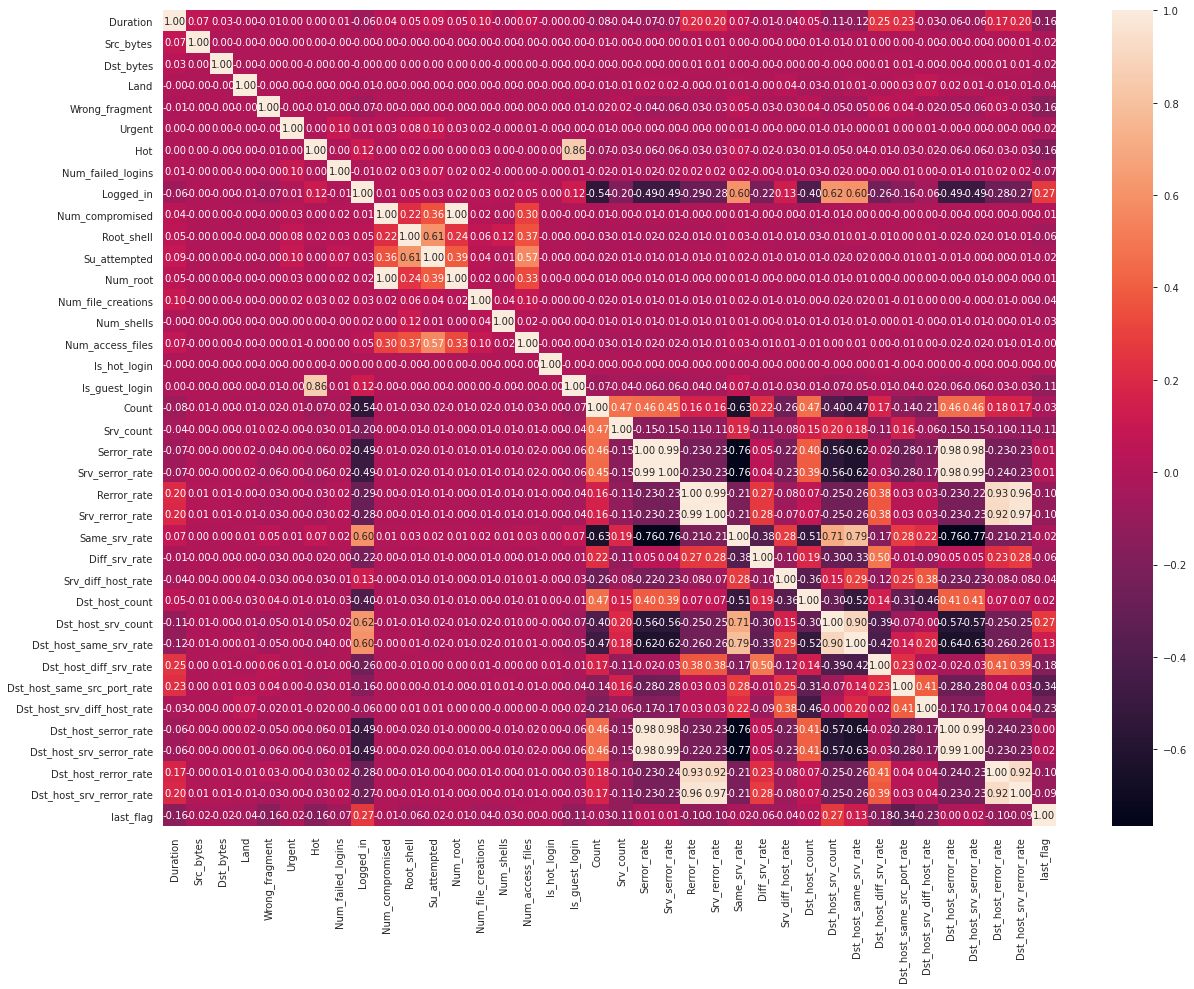

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20,15))
df_corr = train.corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')

### Random 15 columns and make correlations 

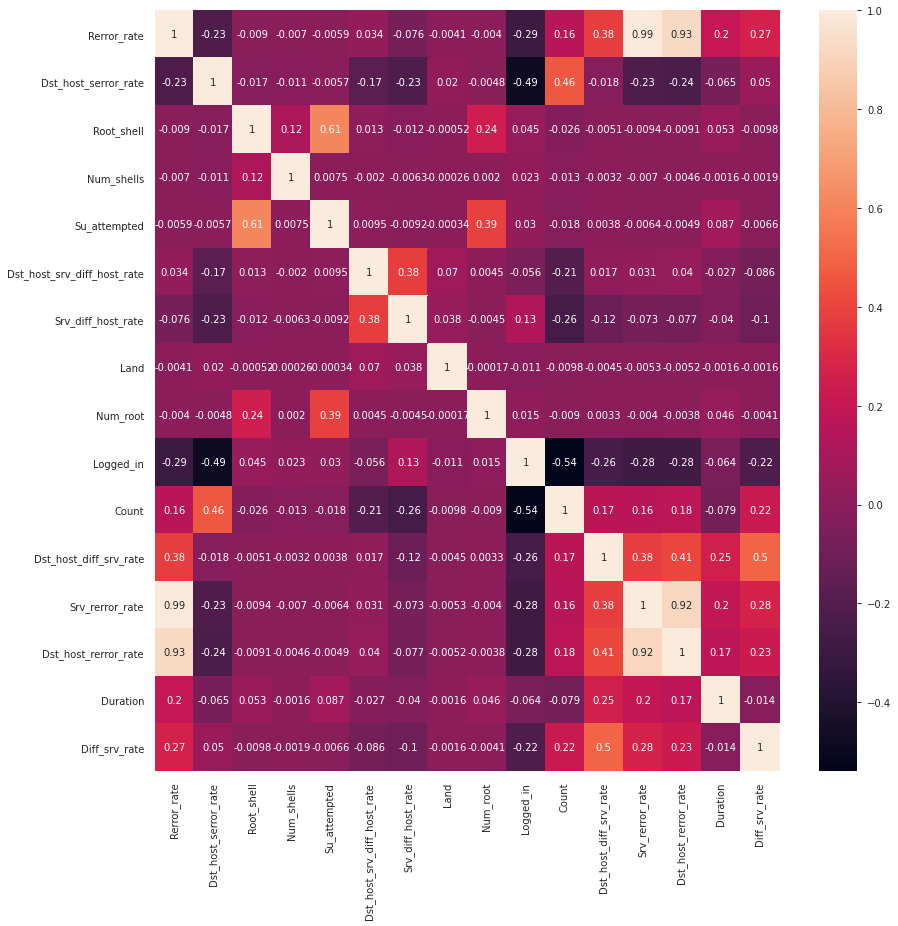

In [ ]:
# Lets take random 15 columns and plot the correlation matrix

small_df = train.sample(20, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(small_corr_matrix, annot=True)

### Lets look at some strong correlation

In [ ]:
# In this block of code we are going to check all the variables with correlation above a certain threshold

corr_threshold = 0.8                                                  # This is a correlation threshold. We need to find variables with greater threshold

print("---------------CHECKING FOR CORRELATION------------")
for c in col_names:
    for r in col_names:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if abs(corr_matrix[r][c]) > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9988334525775052
Is_guest_login : Hot : 0.8602880944553924
Serror_rate : Dst_host_serror_rate : 0.9793730162773534
Serror_rate : Dst_host_srv_serror_rate : 0.981138899596944
Srv_serror_rate : Serror_rate : 0.9932892211996062
Srv_serror_rate : Dst_host_serror_rate : 0.977595940315357
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9862516735922818
Rerror_rate : Dst_host_rerror_rate : 0.9267485372722173
Rerror_rate : Dst_host_srv_rerror_rate : 0.9644486257526368
Srv_rerror_rate : Rerror_rate : 0.9890076407505977
Srv_rerror_rate : Dst_host_rerror_rate : 0.9178223626961614
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.970207964135451
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8966629491273935
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.985052176221345
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.9246879256868642


**Observation**
- Had it been regerssion problem, then we would have had to drop either of the columns highly correlated. 
- However, since this is classification problem we will keep the features for further analysis.
- We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [ ]:
y = train['attack']
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
# These are the different types of attack connections class, (This is from domain knowledge)

DoS = ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm',
      'processtable','worm']
Probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
R2L = ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster',
      'warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack',
       'httptunnel','sendmail','named']
U2R = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

In [ ]:
train['attack'].nunique()

23

In [ ]:
# Function to return the attack class

def attackclass(x):
    if x in DoS:
        return 'DoS'
    elif x in Probe:
        return 'Probe'
    elif x in R2L:
        return 'R2l'
    elif x in U2R:
        return 'U2R'
    elif x == 'normal':
        return 'normal'
    else:
        return 'unknown'


In [ ]:
# Apply the function to the target labels

y = y.apply(attackclass)

In [ ]:
y.head()

0    normal
1       DoS
2    normal
3    normal
4       DoS
Name: attack, dtype: object

In [ ]:
# Checking the number of instances of all the target labels

y.value_counts()

normal    67342
DoS       45927
Probe     11656
R2l         995
U2R          52
Name: attack, dtype: int64

## Plots

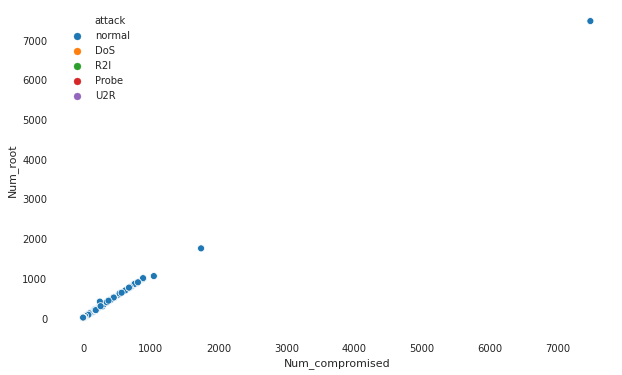

In [ ]:
# Scatter plot of Num_compromised and Num_root 

%matplotlib inline

plt.figure(figsize=(10, 6))
sns.scatterplot('Num_compromised','Num_root', data=train, hue=y)

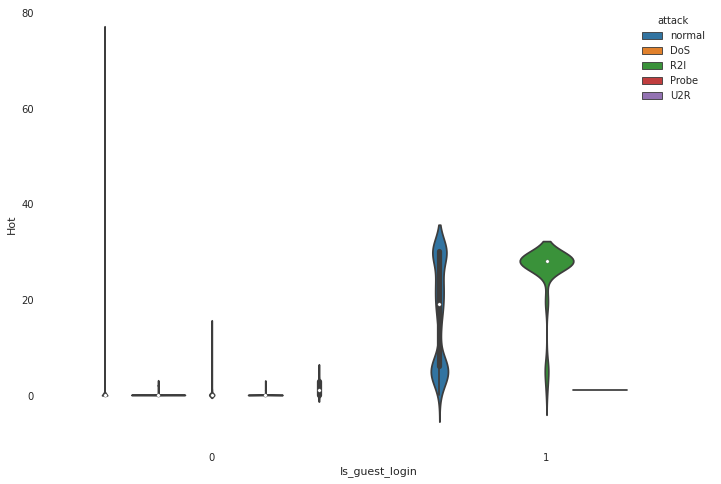

In [ ]:
# Violin plot of Is_guest_login and Hot

plt.figure(figsize=(12, 8))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 0-10 and 25-35 **are actually attack connections**.

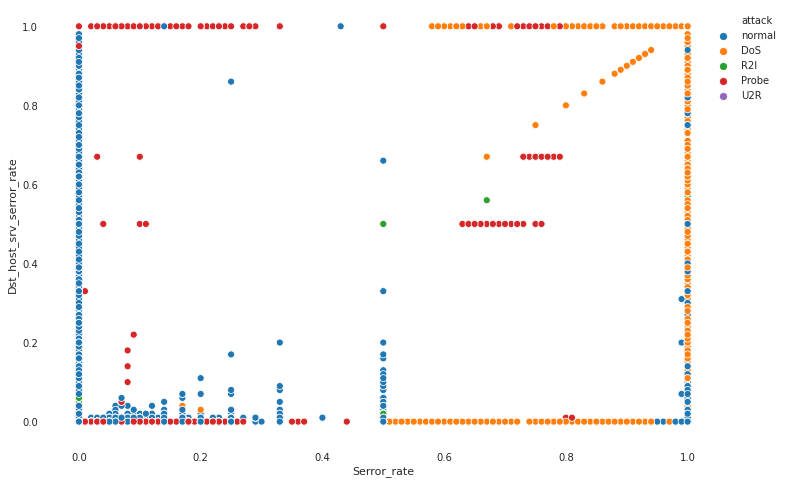

In [ ]:
# Scatter plot of Serror_rate and Dst_host_srv_serror_rate 

plt.figure(figsize=(12, 8))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y)   
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)

**Observation**: There are a lot of attacks happening.

**Observation**: Serror_rate is a clear indicator of whether an attack is hapenning or not.
Serror_rate greater than 0.5 has a lot of attacks.

In [ ]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array(['DoS', 'Probe', 'R2l', 'U2R', 'normal'], dtype=object),
 array([34429,   389,    10,     2,   437]))

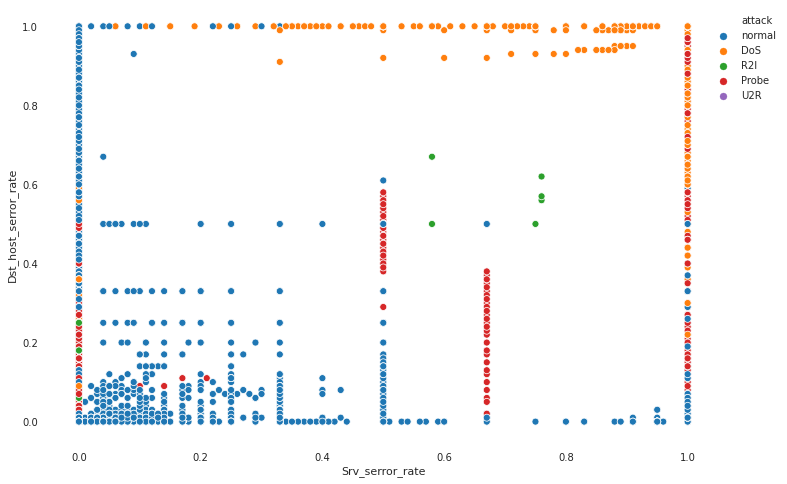

In [ ]:
# Scatter plot of Srv_serror_rate and Dst_host_serror_rate

plt.figure(figsize=(12, 8))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)    
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [ ]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array(['DoS', 'Probe', 'R2l', 'normal'], dtype=object),
 array([34344,   439,    12,   311]))

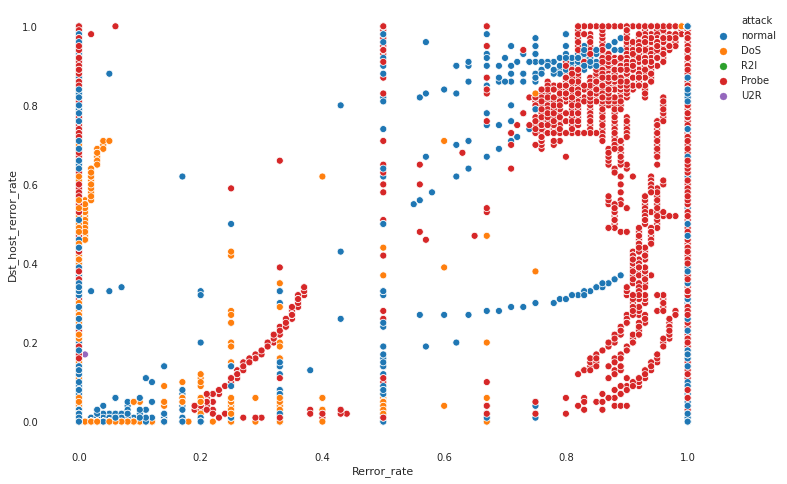

In [ ]:
# Scatter plot of Rerror_rate and Dst_host_rerror_rate  

plt.figure(figsize=(12, 8))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y) 
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)   

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [ ]:
y[train['Rerror_rate'] > 0.5].value_counts()
#np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

DoS       6912
Probe     5264
normal    2948
R2l         50
Name: attack, dtype: int64

**Observation** : 17547 attacks and 3027 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [ ]:
# Lets one hot encode all the categorical columns

encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(125972, 81)

In [ ]:
# We will concat the one hot encoded dataframe with train dataframe

train = pd.concat([train, encoded_cols], axis=1)
train.shape

(125972, 123)

# Creating Features and Labels

In [ ]:
train.shape

(125972, 123)

In [ ]:
# Lets drop the categorical column as we have already included one hot columns

X = train.drop(cat_cols, axis = 1)

# We will also drop the target column "attack"
X = X.drop(['attack'], axis = 1)

In [ ]:
X.shape

(125972, 119)

In [ ]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [ ]:
def model_train(model, name):
    model.fit(X_train, y_train)                                               # Fitting the model
    y_pred = model.predict(X_test)                                            # Making prediction from the trained model
    print(name + " Validation Data")
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")                     # Displaying the Confusion Matrix
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)                                                                 # Displaying the Classification Report
    print('------------------------')
   
    


# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, n_jobs=-1)

In [ ]:
model_train(lr, "Logistic Regression")

Logistic Regression Validation Data
Logistic Regression Confusion Matrix  Validation Data
[[12831     0     0     0   836]
 [ 1739     0     0     0  1790]
 [    1     3     0     0   287]
 [    0     0     0     0    13]
 [  766     0     0     0 19526]]
-----------------------


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logistic Regression Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       0.84      0.94      0.88     13667
       Probe       0.00      0.00      0.00      3529
         R2l       0.00      0.00      0.00       291
         U2R       0.00      0.00      0.00        13
      normal       0.87      0.96      0.91     20292

    accuracy                           0.86     37792
   macro avg       0.34      0.38      0.36     37792
weighted avg       0.77      0.86      0.81     37792

------------------------


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [ ]:
model_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[13659     6     0     0     2]
 [   10  3502     1     1    15]
 [    0     0   277     6     8]
 [    0     2     1     7     3]
 [    3    18    20     5 20246]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13667
       Probe       0.99      0.99      0.99      3529
         R2l       0.93      0.95      0.94       291
         U2R       0.37      0.54      0.44        13
      normal       1.00      1.00      1.00     20292

    accuracy                           1.00     37792
   macro avg       0.86      0.90      0.87     37792
weighted avg       1.00      1.00      1.00     37792

------------------------


## Random Forest Algorithm

In [ ]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [ ]:
model_train(rf_clf, "Random Forest Classifier")

Random Forest Classifier Validation Data
Random Forest Classifier Confusion Matrix  Validation Data
[[13658     4     0     0     5]
 [    2  3495     0     0    32]
 [    0     0   259     0    32]
 [    0     0     0     3    10]
 [    0     9     6     0 20277]]
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13667
       Probe       1.00      0.99      0.99      3529
         R2l       0.98      0.89      0.93       291
         U2R       1.00      0.23      0.38        13
      normal       1.00      1.00      1.00     20292

    accuracy                           1.00     37792
   macro avg       0.99      0.82      0.86     37792
weighted avg       1.00      1.00      1.00     37792

------------------------


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators': range(5,20,2),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

rf = RandomForestClassifier()

rf_gs = GridSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 19.7min finished


In [ ]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')

Grid Search Validation Data
Grid Search Confusion Matrix  Validation Data
[[13666     1     0     0     0]
 [    0  3525     0     0     4]
 [    0     0   285     0     6]
 [    0     4     2     6     1]
 [    2     6     1     1 20282]]
-----------------------
Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13667
       Probe       1.00      1.00      1.00      3529
         R2l       0.99      0.98      0.98       291
         U2R       0.86      0.46      0.60        13
      normal       1.00      1.00      1.00     20292

    accuracy                           1.00     37792
   macro avg       0.97      0.89      0.92     37792
weighted avg       1.00      1.00      1.00     37792

------------------------


## Randomized Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.4s finished


In [ ]:

print("Randomized Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Randomized Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Randomized Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')

Randomized Grid Search Validation Data
Randomized Grid Search Confusion Matrix  Validation Data
[[13667     0     0     0     0]
 [    0  3522     0     0     7]
 [    0     0   286     0     5]
 [    0     3     2     7     1]
 [    0     4     3     0 20285]]
-----------------------
Randomized Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13667
       Probe       1.00      1.00      1.00      3529
         R2l       0.98      0.98      0.98       291
         U2R       1.00      0.54      0.70        13
      normal       1.00      1.00      1.00     20292

    accuracy                           1.00     37792
   macro avg       1.00      0.90      0.94     37792
weighted avg       1.00      1.00      1.00     37792

------------------------


## Model Explanations

### Eli5

In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt, random_state=101).fit(X_test, y_test)              # Evaluate the permutation importance 
eli5.show_weights(perm, feature_names = X_test.columns.values)                      # Display the weights of each features

### SHAP

In [ ]:
row_to_show = 70                                                              # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]

data_to_preddict_array = data_to_predict.values.reshape(1,-1)

dt.predict_proba(data_to_preddict_array)                                         # Prediction probability on the row of the data

array([[9.99824488e-01, 1.75512496e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
dt.predict(data_to_preddict_array)                                               # Predicted output         

array(['DoS'], dtype=object)

In [ ]:
import shap

# Object that can calculate Shap values
explainer = shap.TreeExplainer(dt)                                               # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict)                             # SHAP explanations

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

### LIME

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                         feature_names=X_train.columns.values.tolist(),
                                                         mode='classification',class_names='Attack')

In [ ]:
lime_expln1=explainer.explain_instance(X_test.iloc[1],dt.predict_proba,num_features=X_test.shape[1], top_labels = 1)
lime_expln1.show_in_notebook(show_table=True, show_all=False)

                                               --------------------------- THE END ------------------------------------
